<a href="https://colab.research.google.com/github/desaishivani/Customer-Segmentation/blob/main/Shivani_Desai__ML_Capstone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Capstone 1 - Part 1 E-Commerce Customer Segmentation

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1Kyi1Akx299BFhdo77T2MmWg7fLRtMaXm/view?usp=sharing)

### Context & Problem statement:

In this project, we delve deep into the thriving sector of online retail by analyzing a transactional dataset from a UK-based retailer, available at the UCI Machine Learning Repository. This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through customer segmentation. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the K-means clustering algorithm. This segmentation will allow us to understand the distinct profiles and preferences of different customer groups. Building upon this, we intend to develop a recommendation system that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficacy and fostering increased sales.

### Objectives

- Data Cleaning & Transformation: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.
- Feature Engineering: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.
- Data Preprocessing: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.
- Customer Segmentation using K-Means Clustering: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.
- Cluster Analysis & Evaluation: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.
- Recommendation System: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features
- Understanding the context and significance of each feature

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables(eg Date_since_last_purchase) and do Exploratory Data Analysis (EDA)
- Identifying correlations and patterns in the data
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc.
- Make sure the plots are correctly labelled.
- The code should be commented so that it is readable for the reviewer.

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.

#### Write your code below and do not delete the above instructions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Retrival and observation

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/ElevateMe Capstone/ecommerce_data.csv', encoding='latin1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
print(f"Shape of the dataset: {data.shape}\n")
print(f"Columns of the dataset: {data.columns}\n")
print(f"Info about the dataset: {data.info()}\n")
print(f"Dataset Summary: {data.describe()}\n")

Shape of the dataset: (541909, 8)

Columns of the dataset: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
Info about the dataset: None

Dataset Summary:             Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.6

In [ ]:
print(f"Check for null values: {data.isnull().sum()}\n")
print(f"Check for duplicate values: {data.duplicated().sum()}\n")

Check for null values: InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Check for duplicate values: 5268



Observation from the Data Summary:

1) Shape: (541909, 8): This means 541909 rows and 8 columns(features)

2) Got significant missing values in Description and CustomerID columns: Almost 25% missing was found in customerid which is significant to address for our customer segmentation task.

3) InvoiceDate needs to be converted to Datetime dataypes: currently stored as object InvoiceDate needs to be converted to Datetime for the ananlysis.

4) 5,268 duplicate rows were found in the dataset whcih need to be addressed.

5) Extreme values in Quantity and UnitPrice were found so investigation of negative and extreme values is needed to be done.

# Data preprocessing

In [ ]:
# Remove the duplicates
print(f"Shape before removing duplicates: {data.shape}")
data.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {data.shape}")

Shape before removing duplicates: (541909, 8)
Shape after removing duplicates: (536641, 8)


In [ ]:
# Handele missing values
print(f"Shape before removing Null values in Description: {data.shape}")
data.dropna(subset=['Description'], inplace=True)
print(f"Shape after removing Null values in Description: {data.shape}")

Shape before removing Null values in Description: (536641, 8)
Shape after removing Null values in Description: (535187, 8)


In [ ]:
# Inspect CustomerID nulls
missing_customer_ids = data['CustomerID'].isnull().sum()
print(f"Rows with missing CustomerID: {missing_customer_ids}")

Rows with missing CustomerID: 133583


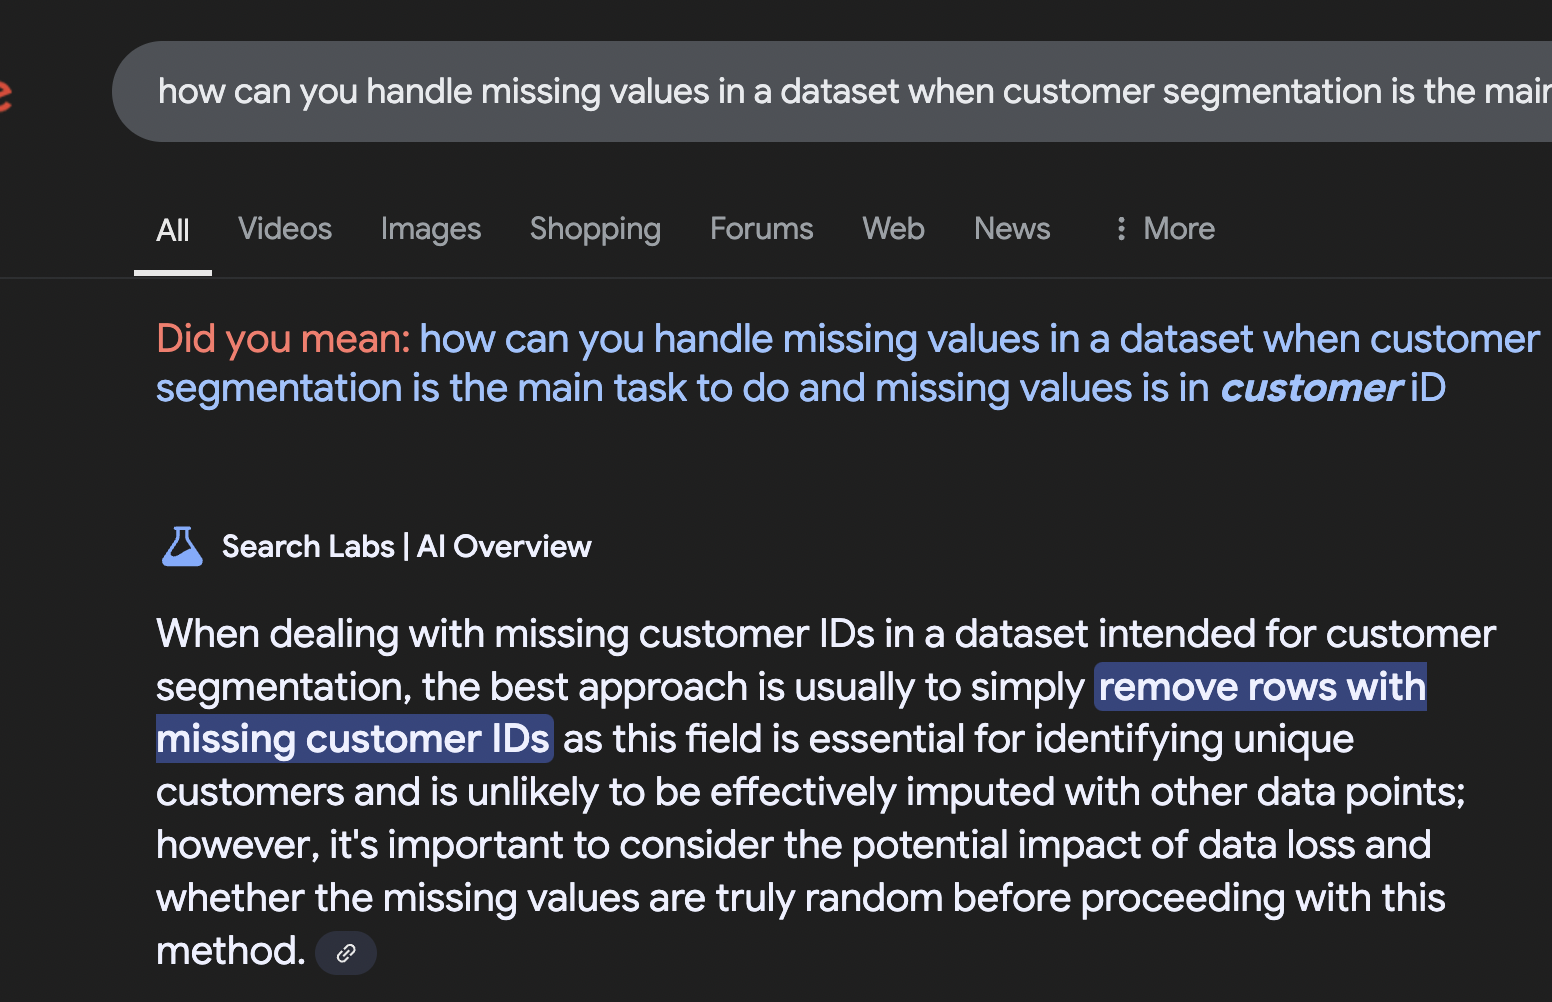

Although we have almost 25% missing values here, but based on the above source, i am deciding to remove the rows with Customer ID's too.

In [ ]:
# remove missing values in Customer ID's
print(f"Shape before removing Null values in Customer ID: {data.shape}")
data = data.dropna(subset=['CustomerID'])
print(f"Shape after removing Null values in Customer ID: {data.shape}")

Shape before removing Null values in Customer ID: (535187, 8)
Shape after removing Null values in Customer ID: (401604, 8)


Removed 5,268 duplicate rows.

Dropped 1,454 rows with missing Description.

The CustomerID column is essential for customer-level analysis and segmentation.Rows without CustomerID cannot contribute to meaningful analysis and must be removed. Although this step results in losing ~25% of the dataset, it ensures the remaining data is reliable for segmentation.

Removed 133,583 rows where CustomerID was missing.

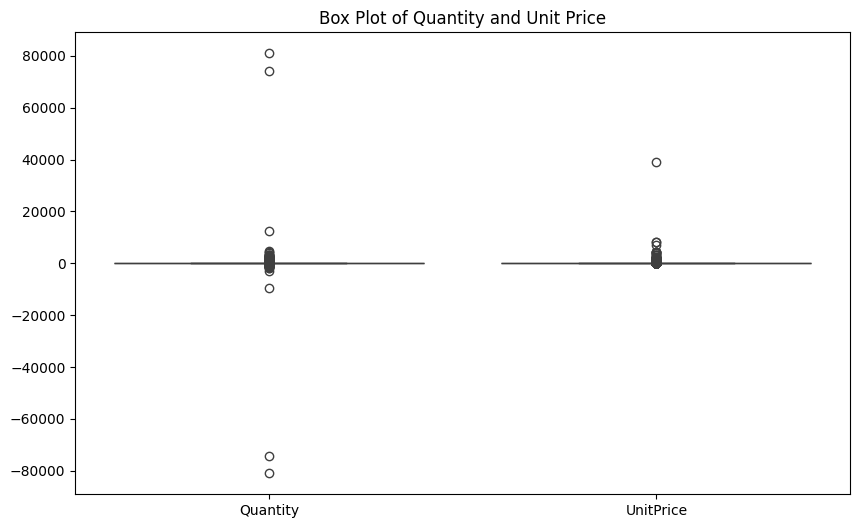

In [ ]:
# prompt: generate box plot for quantity and unit price.Source used Colab inbuilt AI

# Assuming 'data' is your DataFrame and it has 'Quantity' and 'UnitPrice' columns.

plt.figure(figsize=(10,6))
sns.boxplot(data=data[['Quantity', 'UnitPrice']])
plt.title('Box Plot of Quantity and Unit Price')
plt.show()

In [ ]:
# Removing outliers in Quantity and UnitPrice
# Define thresholds based on domain knowledge or the interquartile range (IQR) method
Q1 = data['Quantity'].quantile(0.25)
Q3 = data['Quantity'].quantile(0.75)
IQR = Q3 - Q1
quantity_lower_limit = Q1 - 1.5 * IQR
quantity_upper_limit = Q3 + 1.5 * IQR

Q1_price = data['UnitPrice'].quantile(0.25)
Q3_price = data['UnitPrice'].quantile(0.75)
IQR_price = Q3_price - Q1_price
price_lower_limit = Q1_price - 1.5 * IQR_price
price_upper_limit = Q3_price + 1.5 * IQR_price

print(f"Quantity IQR limits: {quantity_lower_limit} to {quantity_upper_limit}")
print(f"UnitPrice IQR limits: {price_lower_limit} to {price_upper_limit}")

# Filter the dataset
data = data[(data['Quantity'] >= quantity_lower_limit) & (data['Quantity'] <= quantity_upper_limit)]
data = data[(data['UnitPrice'] >= price_lower_limit) & (data['UnitPrice'] <= price_upper_limit)]
print(f"Dataset shape after removing outliers: {data.shape}")

Quantity IQR limits: -13.0 to 27.0
UnitPrice IQR limits: -2.5 to 7.5
Dataset shape after removing outliers: (339453, 8)


### Cleaned Data Summary

In [ ]:
# Summary after cleaning
print("\nCleaned Dataset Info:")
print(data.info())

print("\nCleaned Dataset Summary:")
print(data.describe())

# Check for null values again
print("\nNull Values After Cleaning:")
print(data.isnull().sum())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 339453 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    339453 non-null  object 
 1   StockCode    339453 non-null  object 
 2   Description  339453 non-null  object 
 3   Quantity     339453 non-null  int64  
 4   InvoiceDate  339453 non-null  object 
 5   UnitPrice    339453 non-null  float64
 6   CustomerID   339453 non-null  float64
 7   Country      339453 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 23.3+ MB
None

Cleaned Dataset Summary:
            Quantity      UnitPrice     CustomerID
count  339453.000000  339453.000000  339453.000000
mean        7.350022       2.203459   15312.608184
std         6.890369       1.549676    1711.910209
min       -13.000000       0.000000   12347.000000
25%         2.000000       1.250000   13983.000000
50%         6.000000       1.650000   1521

Since there were some outliers detected in Quantity and UnitPrice, i removed them using IQR method, which resulted into --

Quantity: Values were capped between -13.0 and 27.0 and UnitPrice: Values were capped between -2.5 and 7.5.

Rows before outlier removal: 535,187
Rows after outlier removal: 339,453

Resulting in more improved Data quality.

# Feature Engineering & EDA

In [ ]:
# Ensure 'InvoiceDate' is in datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Feature Engineering: Total_Spend column for each transaction
data['Total_Spend'] = data['Quantity'] * data['UnitPrice']

# Group data by CustomerID for aggregation
customer_data = data.groupby('CustomerID').agg({
    'Total_Spend': 'sum',  # Total revenue per customer
    'InvoiceNo': 'nunique',  # Number of transactions
    'Quantity': 'sum',  # Total items purchased
    'InvoiceDate': 'max'  # Last purchase date
}).reset_index()

# Rename columns for clarity
customer_data.rename(columns={
    'InvoiceNo': 'Purchase_Frequency',
    'Quantity': 'Total_Quantity',
    'InvoiceDate': 'Last_Purchase_Date'
}, inplace=True)

# Create Recency feature (days since last purchase)
latest_date = data['InvoiceDate'].max()
customer_data['Recency'] = (latest_date - customer_data['Last_Purchase_Date']).dt.days

# Drop Last_Purchase_Date (no longer needed)
customer_data.drop(columns=['Last_Purchase_Date'], inplace=True)

# Display the first few rows of the aggregated data
customer_data.head()

,CustomerID,Total_Spend,Purchase_Frequency,Total_Quantity,Recency
0,12347.0,3314.73,7,1893,1
1,12348.0,90.20,3,140,248
2,12349.0,999.15,1,523,18
3,12350.0,294.40,1,196,309
4,12352.0,1010.61,8,437,35


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222 entries, 0 to 4221
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          4222 non-null   float64
 1   Total_Spend         4222 non-null   float64
 2   Purchase_Frequency  4222 non-null   int64  
 3   Total_Quantity      4222 non-null   int64  
 4   Recency             4222 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 165.0 KB


In [ ]:
customer_data.describe()

,CustomerID,Total_Spend,Purchase_Frequency,Total_Quantity,Recency
count,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000
mean,15292.922312,1006.788078,4.613927,590.949076,91.130981
std,1720.777443,2166.600576,8.260000,1241.267296,100.721562
min,12347.000000,-240.640000,1.000000,-128.000000,0.000000
25%,13809.250000,200.242500,1.000000,110.000000,16.000000
50%,15288.500000,457.960000,2.000000,271.000000,49.000000
75%,16772.500000,1107.892500,5.000000,674.000000,143.000000
max,18287.000000,83220.230000,232.000000,48743.000000,373.000000


In [ ]:
# Remove customers with negavtive Total_Spend
customer_data = customer_data[
    (customer_data['Total_Spend'] >= 0) & (customer_data['Total_Quantity'] >= 0)
]
# Summary after cleaning
print("\nCleaned Customer Data Summary:")
print(customer_data.describe())


Cleaned Customer Data Summary:
         CustomerID   Total_Spend  Purchase_Frequency  Total_Quantity  \
count   4191.000000   4191.000000         4191.000000     4191.000000   
mean   15289.720353   1014.461430            4.639466      595.415414   
std     1719.204706   2172.750476            8.285050     1244.757741   
min    12347.000000      0.000000            1.000000        0.000000   
25%    13808.500000    203.500000            1.000000      113.000000   
50%    15280.000000    463.240000            2.000000      274.000000   
75%    16769.500000   1115.470000            5.000000      678.000000   
max    18287.000000  83220.230000          232.000000    48743.000000   

           Recency  
count  4191.000000  
mean     89.872823  
std      99.488548  
min       0.000000  
25%      16.000000  
50%      49.000000  
75%     140.000000  
max     373.000000  


Key Features Created:
* Total_Spend: Measures monetary value of purchases.
* Purchase_Frequency: Tracks how often a customer made purchases.
* Total_Quantity: Indicates the total number of items bought.
* Recency: Reflects how recent the last purchase was (useful for identifying active or inactive customers).

Since there were some customer who has negative Total_spend and Total_Quantity. So these rows are removed to ensure only valid transactions are considered.







### EDA
taken help of ChatGPT to understand what type of plot and feature should i use.

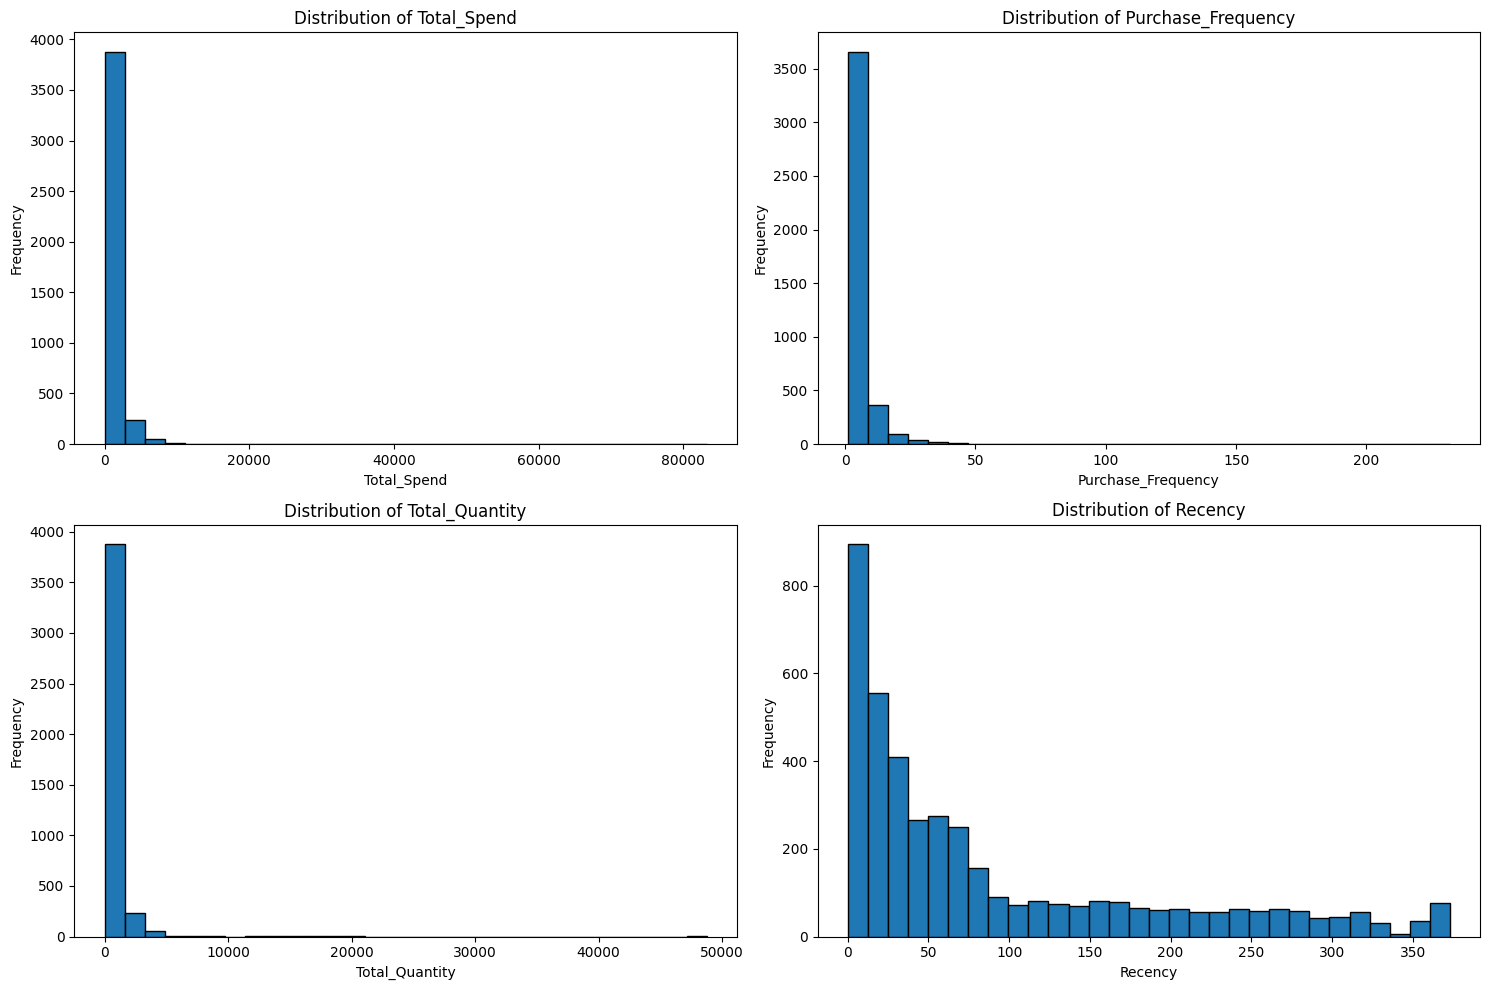

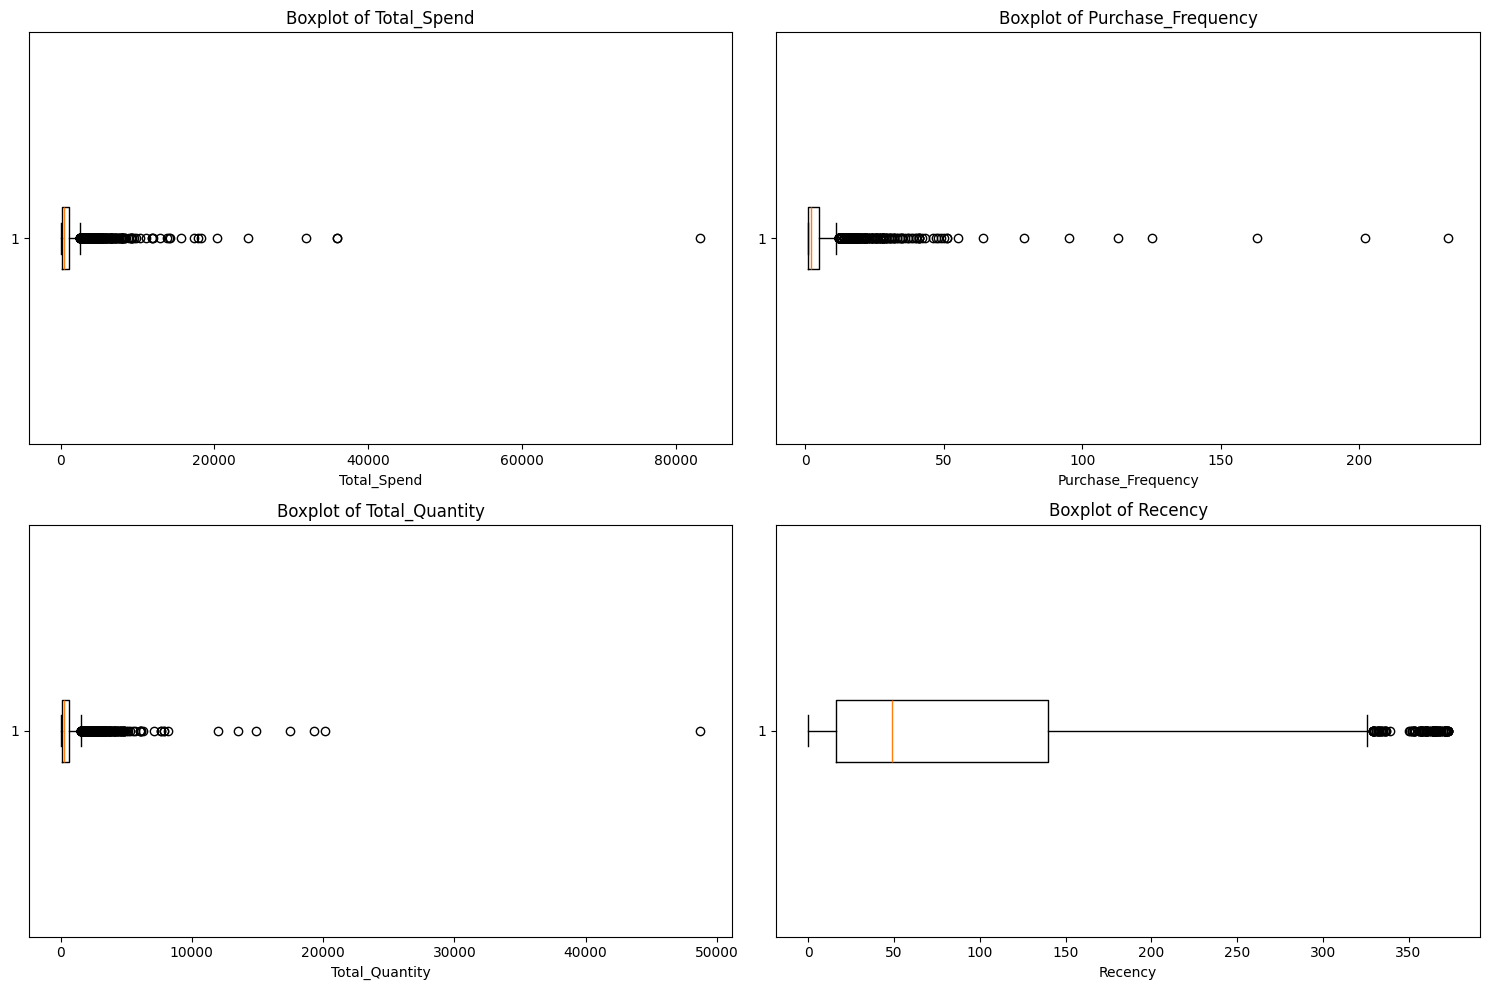

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for key features
features = ['Total_Spend', 'Purchase_Frequency', 'Total_Quantity', 'Recency']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    plt.hist(customer_data[feature], bins=30, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplots to check for outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(customer_data[feature], vert=False)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

Total_Spend: Highly skewed to the right; most customers have low spending, but a few high-value outliers exist.

Purchase_Frequency: The vast majority of customers have low purchase frequency. The distribution is highly right-skewed. A small group of high-frequency outliers exists, potentially representing bulk or loyal buyers.

Total_Quantity: Most customers purchased fewer than 1,000 items, but extreme cases exist.

Recency: Majority of customers purchased recently (low Recency), but many have not purchased in a long time.


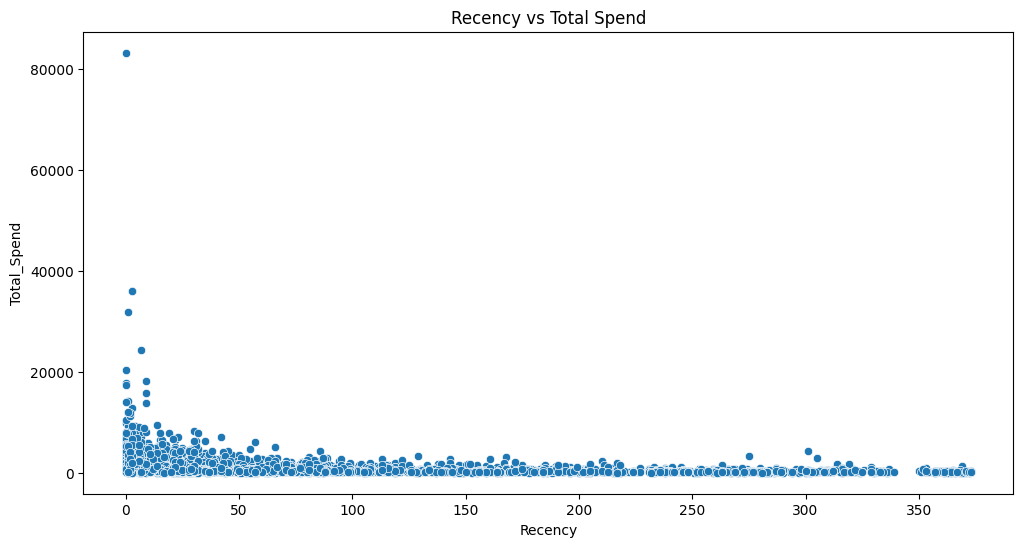

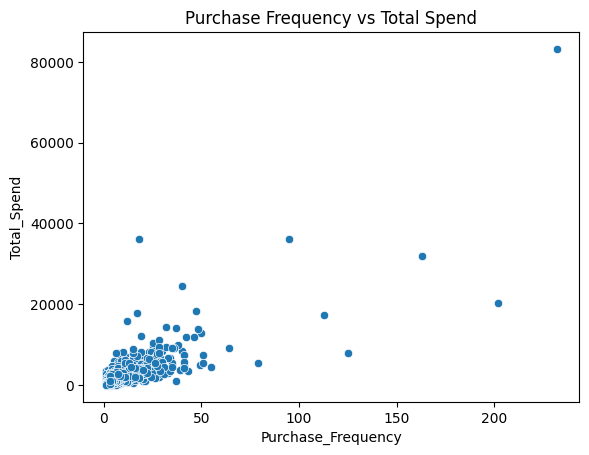

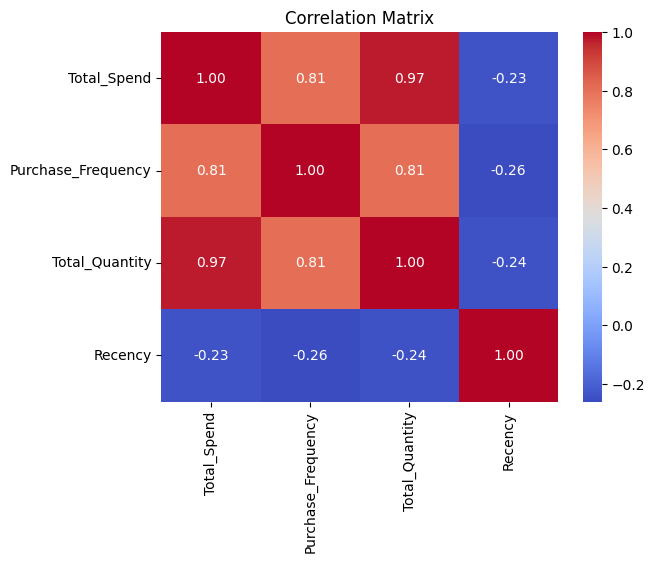

In [ ]:
import seaborn as sns

# Scatter plots
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Recency', y='Total_Spend', data=customer_data)
plt.title('Recency vs Total Spend')
plt.show()

sns.scatterplot(x='Purchase_Frequency', y='Total_Spend', data=customer_data)
plt.title('Purchase Frequency vs Total Spend')
plt.show()

# Correlation matrix
correlation_matrix = customer_data[['Total_Spend', 'Purchase_Frequency', 'Total_Quantity', 'Recency']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Customers with low recency (recent purchases) generally exhibit higher spending.
This highlights that recent engagement is a strong indicator of higher customer value.

The majority of customers have low purchase frequency and correspondingly low total spend.

### Correlation:
Total_Spend and Total_Quantity have a very strong positive correlation (0.97), indicating customers buying more items also tend to spend more.
Purchase_Frequency has a moderate positive correlation (0.81) with Total_Spend and Total_Quantity.
Recency shows a negative correlation with all other features.

# ML Capstone 1 - Part 2 E-Commerce Customer Segmentation

 ## TODO

 ### Feature Selection
- Selecting relevant features for segmentation and classification based on EDA insights
- Scaling numerical features and encoding categorical variables

### Model Preparation
- Preparing the dataset for clustering algorithms and classification models


### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

Write your code below and do not delete the above instructions

Based on the EDA insights, relavant features are Total_Spend, Purchase_Frequency, Total_Quantity, Recency.

In [ ]:
# Drop CustomerID column as it's not needed for segmentation
features = customer_data.drop(columns=['CustomerID'])

# Display the structure of the updated dataset
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4191 entries, 0 to 4221
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Total_Spend         4191 non-null   float64
 1   Purchase_Frequency  4191 non-null   int64  
 2   Total_Quantity      4191 non-null   int64  
 3   Recency             4191 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 163.7 KB


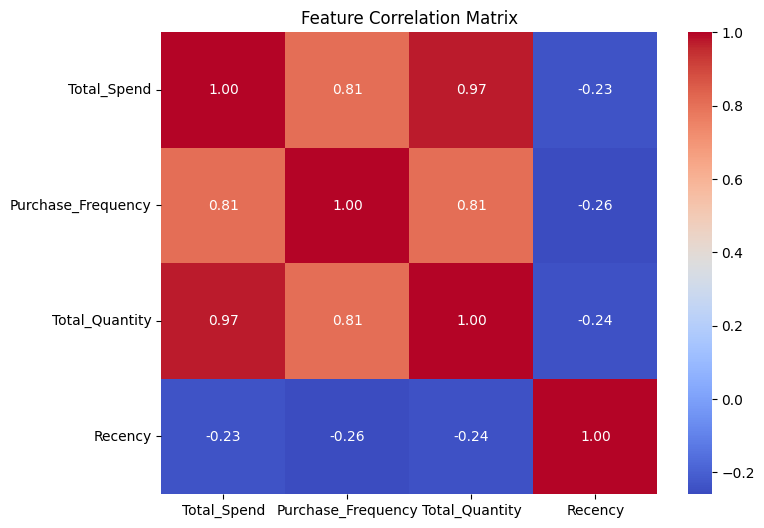

From the correalation matrix, Total_Spend and Total_Quantity is highly correlated(0.97). SO keeping both might not be ideal for segmentation.

So, droppping Total_Quantity maybe be more meaningful for the segmentation task, since Total_Spend is the monetary value which might be more useful than Total_Quantity.

In [ ]:
# Drop Total_Quantity
features = features.drop(columns=['Total_Quantity'])

In [ ]:
# Display the updated DataFrame
features

,Total_Spend,Purchase_Frequency,Recency
0,3314.73,7,1
1,90.20,3,248
2,999.15,1,18
3,294.40,1,309
4,1010.61,8,35
...,...,...,...
4217,137.00,1,277
4218,46.92,1,180
4219,111.68,3,7
4220,2002.63,16,3


## Scaling

It is important to scale the features to similar or standard scale. It ensures acurate and efficient model training and performance.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the features
scaled_features = scaler.fit_transform(features)

# Convert scaled data back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows of the scaled features
scaled_features_df

,Total_Spend,Purchase_Frequency,Recency
0,1.058816,0.284949,-0.893404
1,-0.425439,-0.197906,1.589590
2,-0.007048,-0.439333,-0.722509
3,-0.331445,-0.439333,2.202800
4,-0.001773,0.405663,-0.551615
...,...,...,...
4186,-0.403896,-0.439333,1.881116
4187,-0.445360,-0.439333,0.906013
4188,-0.415551,-0.197906,-0.833088
4189,0.454855,1.371372,-0.873298


In [ ]:
scaled_features_df.describe()

,Total_Spend,Purchase_Frequency,Recency
count,4.191000e+03,4.191000e+03,4.191000e+03
mean,-5.425285e-17,-6.442525e-17,3.348418e-17
std,1.000119e+00,1.000119e+00,1.000119e+00
min,-4.669577e-01,-4.393335e-01,-9.034562e-01
25%,-3.732864e-01,-4.393335e-01,-7.426145e-01
50%,-2.537278e-01,-3.186197e-01,-4.108784e-01
75%,4.649435e-02,4.352146e-02,5.039088e-01
max,3.783940e+01,2.744554e+01,2.846166e+00


# ML Capstone 1 - Part 3 E-Commerce Customer Segmentation

## TODO

### Clustering Algorithms for Customer Segmentation
- Applying unsupervised learning algorithms (e.g., K-means clustering, Hierarchical clustering) to segment customers
- Determining the optimal number of clusters using techniques such as the elbow method or silhouette score
- Interpreting customer segments based on cluster characteristics and feature importance
- Visualize the clusters using PCA

### Classification for Segment Prediction (8 pts)
- Using any of the supervised learning classification algorithms (e.g., Random Forest, Gradient Boosting, Logistic Regression) predict customer segments:

    - Split the dataset into training, validation and test sets
    - Training classification models to predict the segment to which a customer belongs
    - Validating the classification model's performance and generalization using cross-validation techniques
    - Evaluating model performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score)
    - Iteratively refining segmentation and classification strategies based on validation results and stakeholder feedback


### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

#### Write your code below and do not delete the above instructions

## Applying K-Means Clustering Algorithm

It will help to group the customer into segments based on the behavior and pattern.

Segment customers using the K-Means clustering algorithm and determine the optimal number of clusters using the Elbow Method.

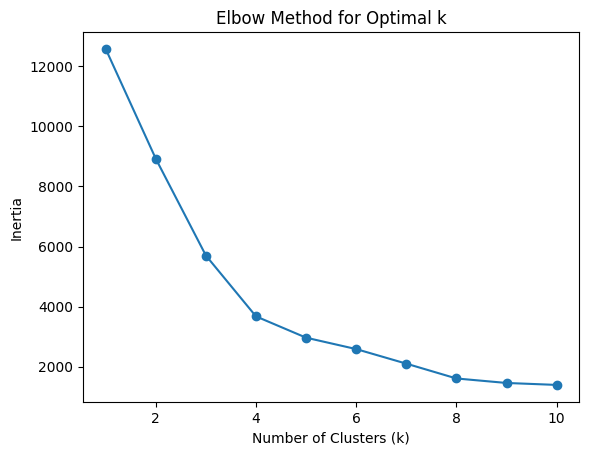

In [ ]:
# prompt: k mean clustering optimal number of cluster using elbow(source: used colab inbulit AI coding assistance)

from sklearn.cluster import KMeans

# Calculate inertia for different values of k
inertia = []
k_values = range(1, 11)  # Test k values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Based on the elbow method plot, the point where the inertia beging to flatten, making the elbow like points in the plot,is the point where we found the optimal number of cluster which is k = 4 in our case from the plot.

Reference source: 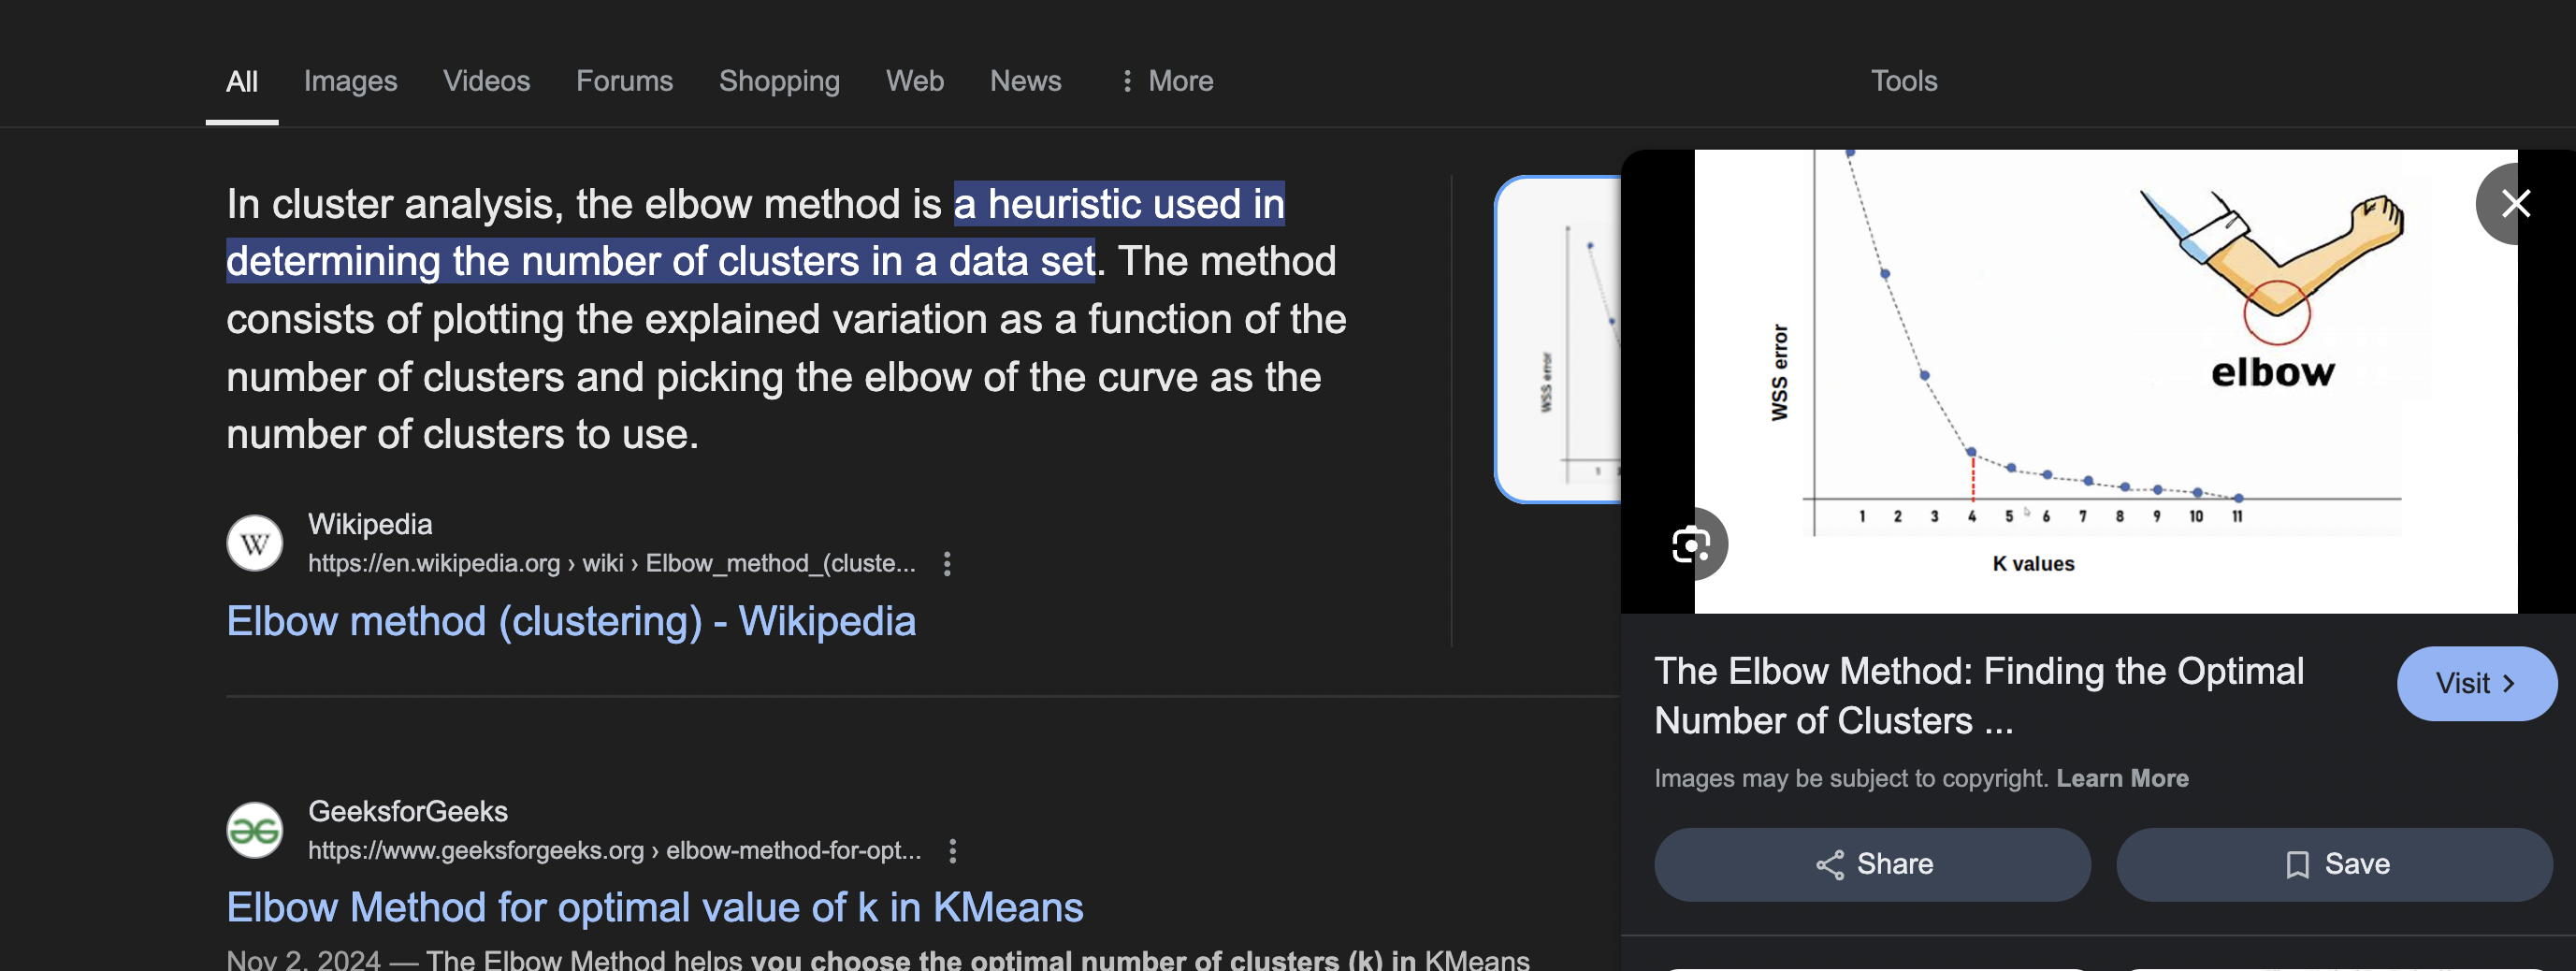

## Check the Cluster 4




In [ ]:
# Apply K-Means with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features_df)

# Add cluster labels to the original dataset
customer_data['Cluster'] = cluster_labels

# Display the first few rows of the dataset with clusters
customer_data.head()

,CustomerID,Total_Spend,Purchase_Frequency,Total_Quantity,Recency,Cluster
0,12347.0,3314.73,7,1893,1,0
1,12348.0,90.20,3,140,248,1
2,12349.0,999.15,1,523,18,0
3,12350.0,294.40,1,196,309,1
4,12352.0,1010.61,8,437,35,0


In [ ]:
# Analyze cluster distributions
cluster_counts = customer_data['Cluster'].value_counts()
print("\nCluster Distributions:")
print(cluster_counts)


Cluster Distributions:
Cluster
0    2867
1    1036
3     284
2       4
Name: count, dtype: int64


Based on this Cluster 2 is extremely small in size, but it has extremely high spenders classified as VIP customer.This imbalance might negatively affect classification model training.

In [ ]:
# Aggregate data to understand cluster characteristics
cluster_summary = customer_data.groupby('Cluster').agg({
    'Total_Spend': ['mean', 'std'],
    'Purchase_Frequency': ['mean', 'std'],
    'Total_Quantity': ['mean', 'std'],
    'Recency': ['mean', 'std']
}).reset_index()

cluster_summary

Cluster   Total_Spend               Purchase_Frequency             \
                   mean           std               mean        std   
0       0    812.840650    751.591069           3.811999   2.925074   
1       1    302.970947    342.047293           1.730695   1.341952   
2       2  42865.100000  27704.759292         173.000000  59.177699   
3       3   5055.828908   3492.672255          21.232394  13.079893   

  Total_Quantity                   Recency             
            mean           std        mean        std  
0     494.536449    474.325454   41.876526  35.389796  
1     175.897683    205.643802  244.422780  66.930787  
2   25786.250000  15475.686509    1.000000   1.414214  
3    2789.348592   1849.651183   11.869718  21.984268

Based on the above cluster summary:

* Cluster 0: This cluster has general customer with the average spending of $812. So they are moderately active customer.

* Cluster 1: This cluster has relatively low spending and they are highly infrequent.

* Cluster 2: This cluster consist of exclusive VIP customers with high spending.

* Cluster 3: This cluster has customers with moderated spending but frequent shopper.

To better understand the cluster seperation, we will use PCA to visualize the cluster and to reduce dimensions





In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Initialize PCA for 2 components
pca = PCA(n_components=2)

# Apply PCA on the scaled features
pca_features = pca.fit_transform(scaled_features_df)

# Convert the result into a DataFrame
pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = cluster_labels

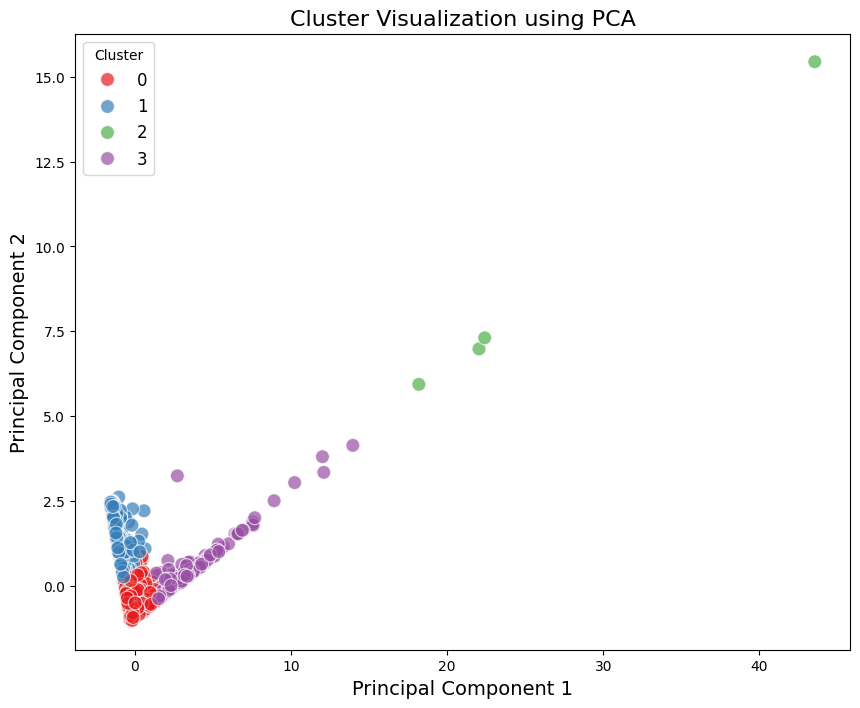

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=pca_df,
    palette='Set1', alpha=0.7, s=100
)

# Add plot details
plt.title('Cluster Visualization using PCA', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.show()

From the plot: Cluster 0 and 1 are tightly clustered together.
Cluster 3 points are scattered along the x-axis.
Cluster 2 points are spread out.

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_features_df, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5793560655883291


So we obtained moderately well Silhouette Score value which indicates the clusters are reasonablye well-seperated. Now we will move on segment prediction using supervised learning classification algorithms

## Classification for Segment Prediction

In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = customer_data.drop(columns=['Cluster', 'CustomerID'])  # Drop 'Cluster' for prediction
y = customer_data['Cluster']  # Target variable (customer segments)

# Split into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 2514
Validation set size: 838
Test set size: 839


Lets start by training the simple model Random Forest Classifier, later we can experiment with other model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate the model's performance
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Classification report
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.9964

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       573
           1       1.00      1.00      1.00       207
           2       0.50      1.00      0.67         1
           3       1.00      0.95      0.97        57

    accuracy                           1.00       838
   macro avg       0.87      0.99      0.91       838
weighted avg       1.00      1.00      1.00       838



On class 0,1 and 3 the model perform exceptinally well, while Class 2 performance is very poor, likely due to the less number of sample.

So That's because the imbalanced dataset and overfitting of model on the majority class

In [ ]:
# Predict on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate the model's performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.9917

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       574
           1       1.00      1.00      1.00       207
           2       1.00      1.00      1.00         1
           3       0.92      0.98      0.95        57

    accuracy                           0.99       839
   macro avg       0.98      0.99      0.99       839
weighted avg       0.99      0.99      0.99       839



The test accuracy of 99.17% confirms that our model is generalizing well on unseen data.

For Class 2, precision, recall and f1 score are perfect but there is only 1 instance in the test set, so balancing the data set might still improve the robustness.

To further validate the model's performance and ensure robustness, we will perform k-fold cross-validation.


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.99005964 0.99005964 0.99403579 0.99403579 0.99203187]
Mean Cross-Validation Accuracy: 0.9920


The cross-validation accuracy scores are very consistent, ranging between 99.00% and 99.40%, with a mean accuracy of 99.20%. This confirms that the model is robust, generalizes well, and is not overfitting.

## Further Refinement

The cross-validation results confirm that the model performs robustly, with a mean accuracy of 99.20%.
However, the imbalance in Cluster 2 (class 2) and slight variability in Cluster 3’s performance suggest room for improvement.

### Balancing the dataset

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42, k_neighbors=1)
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

# Check class distribution after balancing
from collections import Counter
print(f"Balanced class distribution: {Counter(y_balanced)}")

Balanced class distribution: Counter({0: 1720, 1: 1720, 3: 1720, 2: 1720})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
# Re-Train a Random Forest Classifier on the balanced dataset
balanced_model = RandomForestClassifier(random_state=42, n_estimators=100)
balanced_model.fit(X_balanced, y_balanced)

# Predict on the validation set
y_val_pred_balanced = balanced_model.predict(X_val)

# Evaluate performance on the validation set
print("Validation Accuracy (Balanced):", accuracy_score(y_val, y_val_pred_balanced))
print("\nClassification Report (Validation Set - Balanced):")
print(classification_report(y_val, y_val_pred_balanced))

Validation Accuracy (Balanced): 0.9976133651551312

Classification Report (Validation Set - Balanced):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       573
           1       1.00      1.00      1.00       207
           2       1.00      1.00      1.00         1
           3       1.00      0.98      0.99        57

    accuracy                           1.00       838
   macro avg       1.00      1.00      1.00       838
weighted avg       1.00      1.00      1.00       838



In [ ]:
# Predict on the test set
y_test_pred_balanced = balanced_model.predict(X_test)

# Evaluate performance on the test set
print("Test Accuracy (Balanced):", accuracy_score(y_test, y_test_pred_balanced))
print("\nClassification Report (Test Set - Balanced):")
print(classification_report(y_test, y_test_pred_balanced))

Test Accuracy (Balanced): 0.9916567342073898

Classification Report (Test Set - Balanced):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       574
           1       1.00      1.00      1.00       207
           2       1.00      1.00      1.00         1
           3       0.90      1.00      0.95        57

    accuracy                           0.99       839
   macro avg       0.97      1.00      0.99       839
weighted avg       0.99      0.99      0.99       839



While precision and recall for Class 3 remain strong, there is a slight drop in precision compared to other classes. However, this is minor and may not require further intervention.

To make the model actionable for the stakeholders, we can do feature importance ananlysis to identify most important feature and then provide tailored marketing recommendation based on the key features identified.

In [ ]:
# Extract feature importance from the Random Forest model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': balanced_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

              Feature  Importance
1  Purchase_Frequency    0.361666
3             Recency    0.309003
0         Total_Spend    0.167932
2      Total_Quantity    0.161399


Since Purchase_Frequency is most significant features, customers who purchase more frequently should be consider as VIP customers. Recency is also important feature where customer with recent purchases tend to belong to high value customer. While for Total_Spend, it indicates that even moderate spenders can belong to high-value segments if they are frequent or recent buyers.

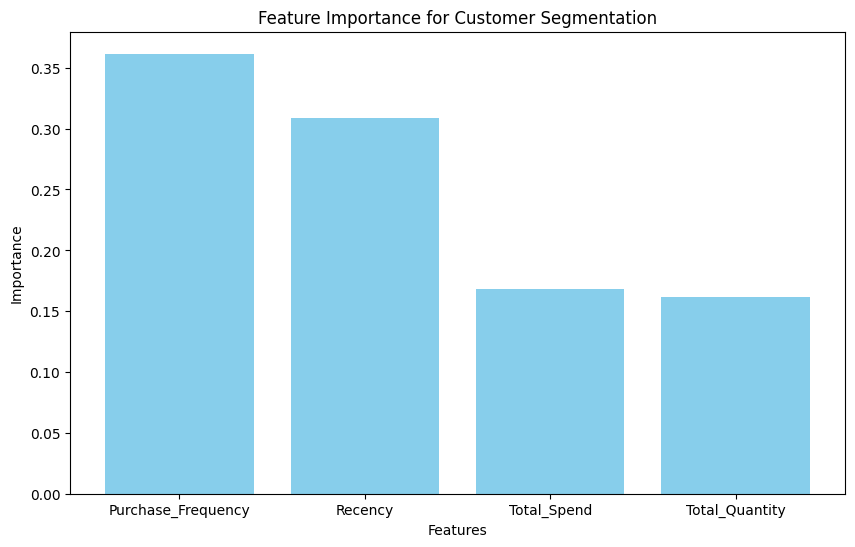

Cluster 0 (High-Frequency Moderate Spenders): We can offer frequent buyers discount and try to bundle offers to increase the cart size. 
Cluster 1(Low-Frequency, Infrequent Buyers): Re-engage with personalized promotions by sending personalised email about promotion for the items they have bought earlier
Cluster 2 (VIP customer, High spenders): Retain VIPs with loyalty programs, offer them exclusive VIP discount
Cluster 3(Moderate Spenders, Active): Foster repeat purchases with reward points, aimimig to increase the frequency and spending


In [ ]:
# Define insights for each cluster
clusters = ['Cluster 0 (High-Frequency Moderate Spenders)', 'Cluster 1(Low-Frequency, Infrequent Buyers)', 'Cluster 2 (VIP customer, High spenders)', 'Cluster 3(Moderate Spenders, Active)']
strategies = [
    "We can offer frequent buyers discount and try to bundle offers to increase the cart size. ",
    "Re-engage with personalized promotions by sending personalised email about promotion for the items they have bought earlier",
    "Retain VIPs with loyalty programs, offer them exclusive VIP discount",
    "Foster repeat purchases with reward points, aimimig to increase the frequency and spending"
]

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('Feature Importance for Customer Segmentation')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

# Display cluster strategies
for cluster, strategy in zip(clusters, strategies):
    print(f"{cluster}: {strategy}")

With the assistance of ChatGPT, I have gained a comprehensive understanding of the contributions each cluster makes to the essential features. Consequently, I have developed a strategic plan for an effective marketing campaign.
